 **By: Samira Asadzadeh  40116341054541**

*   **Advisor:  Dr. Mr.Asadi**

*  **ISLAMIC AZAD UNIVERSITY SHIRAZ BRANCH Faculty of engineering**



# **Convolutional autoencoder for image denoising**

#Import Library

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

#Normalizes the supplied array and reshapes it into the appropriate format.
آرایه ارائه شده را عادی می کند و آن را به فرمت مناسب تغییر شکل می دهد

In [ ]:
def preprocess(array):
    """
    Normalizes the supplied array and reshapes it into the appropriate format.
    """

    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array


#NAdds random noise to each image in the supplied array
نویز تصادفی را به هر تصویر در آرایه ارائه شده اضافه می کند

In [ ]:
def noise(array):
    """
    Adds random noise to each image in the supplied array.
    """

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


#Displays ten random images from each one of the supplied arrays
ده تصویر تصادفی را از هر یک از آرایه های ارائه شده نمایش می دهد

In [ ]:
def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

# Prepare the data
#Since we only need images from the dataset to encode and decode, we won't use the labels.
از آنجایی که ما فقط به تصاویر از مجموعه داده برای رمزگذاری و رمزگشایی نیاز داریم، از برچسب ها استفاده نخواهیم کرد.

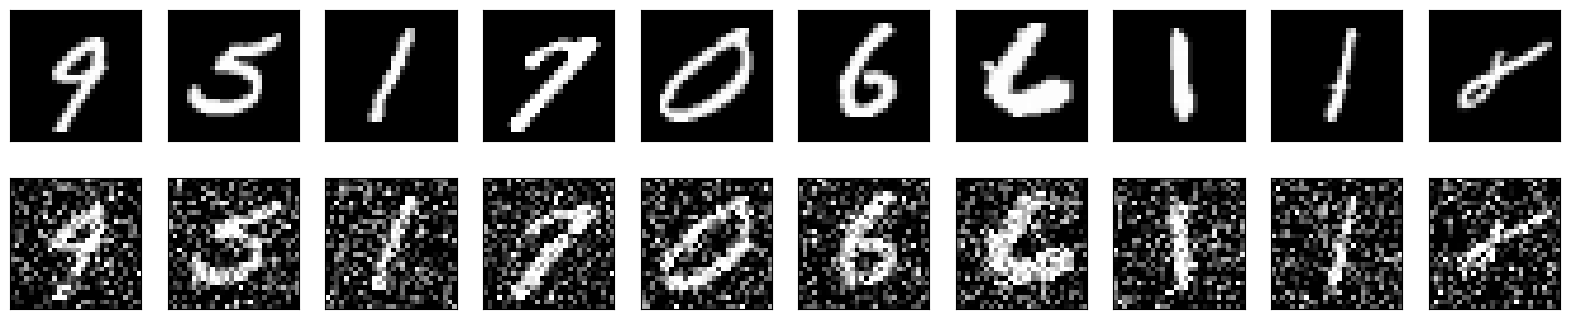

In [ ]:
# Since we only need images from the dataset to encode and decode, we
# won't use the labels.
(train_data, _), (test_data, _) = mnist.load_data()

# Normalize and reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)

# Create a copy of the data with added noise
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

# Display the train data and a version of it with added noise
display(train_data, noisy_train_data)

# Build the autoencoder

We are going to use the Functional API to build our convolutional autoencoder.

In [ ]:
input = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_transpose (Conv2DTr  (None, 14, 14, 32)        9248  

# Now we can train our autoencoder using train_data as both our input data and target. Notice we are setting up the validation data using the same format.

اکنون می توانیم رمزگذار خودکار خود را با استفاده از داده آموزشی به عنوان داده ورودی و هدف آموزش دهیم. توجه داشته باشید که داده های اعتبارسنجی را با استفاده از همان قالب تنظیم می کنیم.

In [ ]:
autoencoder.fit(
    x=train_data,
    y=train_data,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(test_data, test_data),
)

Epoch 1/50
469/469 [==============================] - 17s 12ms/step - loss: 0.1307 - val_loss: 0.0729
Epoch 2/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0713 - val_loss: 0.0694
Epoch 3/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0691 - val_loss: 0.0679
Epoch 4/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0679 - val_loss: 0.0671
Epoch 5/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0672 - val_loss: 0.0664
Epoch 6/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0666 - val_loss: 0.0659
Epoch 7/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0662 - val_loss: 0.0656
Epoch 8/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0658 - val_loss: 0.0652
Epoch 9/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0656 - val_loss: 0.0650
Epoch 10/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0653 - val_loss: 0.0

Let's predict on our test dataset and display the original image together with the prediction from our autoencoder.

Notice how the predictions are pretty close to the original images, although not quite the same.

بیایید روی مجموعه داده آزمایشی خود پیش‌بینی کنیم و تصویر اصلی را همراه با پیش‌بینی رمزگذار خودکارمان نمایش دهیم.


توجه داشته باشید که چگونه پیش بینی ها بسیار نزدیک به تصاویر اصلی هستند، اگرچه کاملاً یکسان نیستند.

313/313 [==============================] - 1s 3ms/step


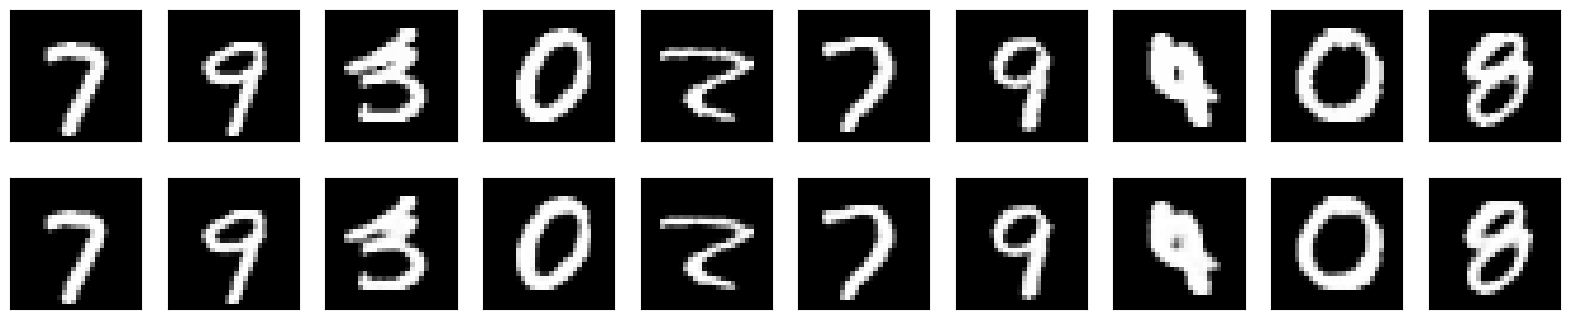

In [ ]:
predictions = autoencoder.predict(test_data)
display(test_data, predictions)

Now that we know that our autoencoder works, let's retrain it using the noisy data as our input and the clean data as our target. We want our autoencoder to learn how to denoise the images.

اکنون که می دانیم رمزگذار خودکار ما کار می کند، بیایید آن را با استفاده از داده های پر سر و صدا به عنوان ورودی و داده های تمیز به عنوان هدف خود آموزش دهیم. ما می خواهیم رمزگذار خودکار ما یاد بگیرد که چگونه تصاویر را حذف کند.

In [ ]:
autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=100,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)

Epoch 1/100
469/469 [==============================] - 4s 9ms/step - loss: 0.1019 - val_loss: 0.0940
Epoch 2/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0936 - val_loss: 0.0919
Epoch 3/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0919 - val_loss: 0.0907
Epoch 4/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0909 - val_loss: 0.0899
Epoch 5/100
469/469 [==============================] - 4s 7ms/step - loss: 0.0902 - val_loss: 0.0892
Epoch 6/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0897 - val_loss: 0.0889
Epoch 7/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0892 - val_loss: 0.0885
Epoch 8/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0889 - val_loss: 0.0882
Epoch 9/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0886 - val_loss: 0.0880
Epoch 10/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0883 - val_l

Let's now predict on the noisy data and display the results of our autoencoder.

Notice how the autoencoder does an amazing job at removing the noise from the input images.

بیایید اکنون روی داده های پر سر و صدا پیش بینی کنیم و نتایج رمزگذار خودکار خود را نمایش دهیم.

توجه داشته باشید که چگونه رمزگذار خودکار کار شگفت انگیزی در حذف نویز از تصاویر ورودی انجام می دهد.

313/313 [==============================] - 1s 3ms/step


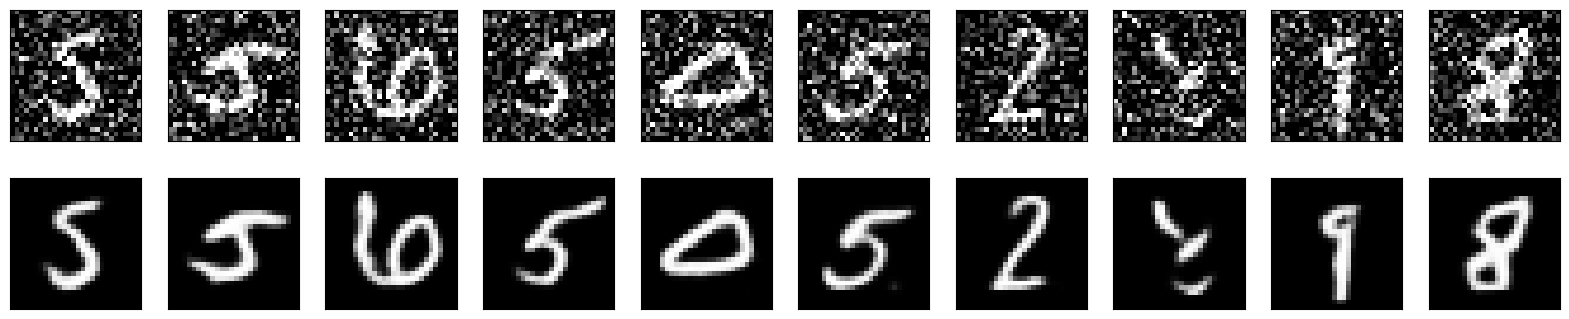

In [ ]:
predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)